In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_guai_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Guaiol
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444444
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444444
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444444
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.444444
4,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
74997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.222222


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Guaiol', 'index'], axis = 1)
y = df_knn[['X..Guaiol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.44444444],
       [0.44444444],
       [0.44444444],
       ...,
       [0.22222222],
       [0.22222222],
       [0.22222222]])

<AxesSubplot:ylabel='Count'>

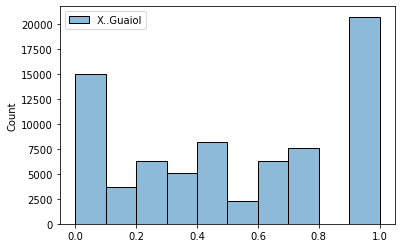

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.08909984968118304

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.03032212926589684

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17413250490904

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8800681070290315

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.7846205772918473

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([7.45731886e-02, 6.76691277e-02, 7.18662281e-02, 7.22797211e-02,
       7.04945596e-02, 3.79943192e-02, 7.53824580e-04, 3.53123508e-01,
       1.53085052e-04, 2.21163280e-03, 3.63895599e-03, 3.58259256e-07,
       8.30370609e-03, 1.68516252e-04, 2.73121609e-03, 4.42310023e-03,
       6.89487262e-03, 4.97667879e-03, 5.15490029e-07, 7.92089962e-03,
       4.60223533e-08, 4.14666481e-07, 9.64166592e-03, 8.18580251e-03,
       5.63811232e-03, 2.77328499e-03, 5.36503310e-03, 2.25146176e-04,
       2.20708799e-07, 2.12908155e-03, 5.53922807e-03, 2.36684874e-07,
       7.11297330e-03, 0.00000000e+00, 0.00000000e+00, 4.25172411e-03,
       4.85622978e-03, 6.64416231e-03, 1.61467409e-03, 1.06546454e-04,
       6.74163329e-05, 4.42335362e-03, 7.74798582e-05, 1.65273545e-02,
       1.94900318e-04, 1.29709908e-03, 4.75626138e-04, 2.46143542e-04,
       8.74399228e-03, 1.91978631e-03, 9.91337376e-03, 1.27927860e-02,
       2.66729960e-03, 2.08768103e-03, 3.66558628e-03, 4.21183228e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,blueberry,earthy,lemon
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0
4,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0
74997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,0,1,1,1


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'blueberry',
 'earthy',
 'lemon']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_guai.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_guai.pkl")

['selector_knn_lsa_elbow_guai.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.0947082666870167

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.03122501197484918

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17670600435426403

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8695044337654612

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.7779292928235841

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.051280570205185

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.14088035101573917

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9818968721380942

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8588471952766763

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_guai.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_guai.pkl")

['y_test_knreg_lsa_elbow_guai.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.047565085351245456

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01830155279543458

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13528323176001741

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8728527496721572

In [65]:
y_test

,X..Guaiol
11591,1.000000
52020,0.000000
34666,0.777778
22169,1.000000
23049,1.000000
...,...
60863,0.277778
32316,0.000000
60933,0.277778
43206,0.666667


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

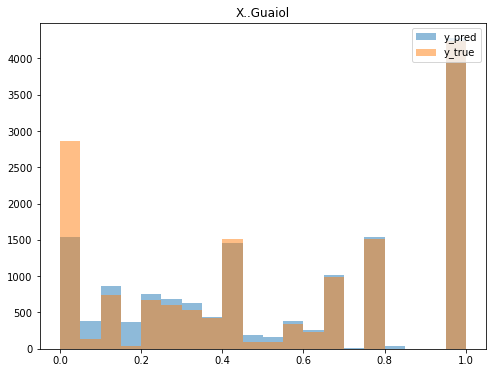

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Guaiol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_guai.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.937
P-value: 0.000


<AxesSubplot:>

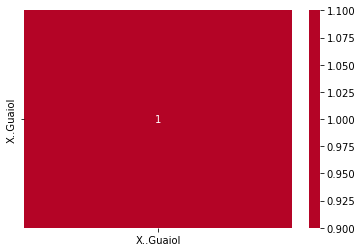

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)